Gathering Data for this Project

Gather each of the three pieces of data as described below in a Jupyter Notebook titled wrangle_act.ipynb:

The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv 
    DONE

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.


In [1]:
#import packages
import pandas as pd
import numpy as np
import requests 
import tweepy
from tweepy import OAuthHandler
import json
import os
from timeit import default_timer as timer

## First piece of data: twitter archive

In [2]:
# create twitter archive df
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## Second piece of data: image predictions

In [5]:
#request the image predictions tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

In [5]:
# create a folder for the images

folder_name = 'dogs'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
# save the tsv file to dogs folder and name it as the last piece of the url
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(r.content)

In [3]:
# check if data has been gathered
df_image = pd.read_csv('dogs/image-predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Third piece of data: twitter api

In [8]:
# set up the twitter api
# dont forget to hide the secret info later

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
tweet_ids = df_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Rate limit reached. Sleeping for: 720
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Succe

2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 6713

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [4]:
# Finally, write the json file to df
# This question from the message board was very helpful:
# https://knowledge.udacity.com/questions/28389
df_tweets = pd.DataFrame(columns=['tweet_id', 'id_int','retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        id_int = status['id']                         
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_tweets = df_tweets.append(pd.DataFrame([[tweet_id, id_int, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'id_int','retweet_count', 'favorite_count']))
df_tweets = df_tweets.reset_index(drop=True)



In [9]:
df_tweets.head()

,tweet_id,id_int,retweet_count,favorite_count
0,892420643555336193,892420643555336193,7917,37064
1,892177421306343426,892177421306343426,5882,31890
2,891815181378084864,891815181378084864,3883,24003
3,891689557279858688,891689557279858688,8073,40390
4,891327558926688256,891327558926688256,8749,38610


## Assessing Data 
### Part 1: Visual Assessment

### Tweet archive data visual review

In [8]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Finding
This data set looks pretty good. Clean and tidy as far as I can tell. I think the NaNs are mostly because the tweets are not retweets/replies/etc.

### Image df visual review

In [25]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Finding
No obvious problems here. There may be issues with the capitalization of dog names, but probably ok there too.

### Tweets df visual assessment

In [11]:
df_tweets.head()

,tweet_id,id_int,retweet_count,favorite_count
0,892420643555336193,892420643555336193,7917,37064
1,892177421306343426,892177421306343426,5882,31890
2,891815181378084864,891815181378084864,3883,24003
3,891689557279858688,891689557279858688,8073,40390
4,891327558926688256,891327558926688256,8749,38610


### Finding
This looks good. The tweet ids as str and ints is interesting...

### Programmatic assessment
### 
### Tweets archive data

In [12]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# Looking at the Source column, it's probably not useful.
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
# see what's going on with the doggo, etc columns:
df_archive.doggo.value_counts(), df_archive.floofer.value_counts(), df_archive.pupper.value_counts(), df_archive.puppo.value_counts()


(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [15]:
# As mentioned in the project motivation section, these ratings are not good quality, so will need to be addressed.
df_archive.rating_numerator.value_counts(), df_archive.rating_denominator.value_counts()

(12      558
 11      464
 10      461
 13      351
 9       158
 8       102
 7        55
 14       54
 5        37
 6        32
 3        19
 4        17
 1         9
 2         9
 420       2
 0         2
 15        2
 75        2
 80        1
 20        1
 24        1
 26        1
 44        1
 50        1
 60        1
 165       1
 84        1
 88        1
 144       1
 182       1
 143       1
 666       1
 960       1
 1776      1
 17        1
 27        1
 45        1
 99        1
 121       1
 204       1
 Name: rating_numerator, dtype: int64, 10     2333
 11        3
 50        3
 80        2
 20        2
 2         1
 16        1
 40        1
 70        1
 15        1
 90        1
 110       1
 120       1
 130       1
 150       1
 170       1
 7         1
 0         1
 Name: rating_denominator, dtype: int64)

In [16]:
# Looking at the replies, it looks they are technically dog ratings, of other tweets. 
# lots of them are replies to celebrities or other personalities: Snoop Dogg gets 420/10, 
# @s8n gets 666/10 (get it? 'satan')

df_archive[df_archive.in_reply_to_status_id >= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [25]:
# Checking where the denom is not 10
df_archive[df_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [28]:
# These tweets with 11 as denominator reference 9/11 and 7/11 in the text.

df_archive[df_archive.rating_denominator == 11]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [39]:
# I noticed this tweet says the dog has "3 1/2" legs so checking for rating: 
df_archive[(df_archive.rating_denominator == 2)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


### Finding

#### Tidiness

    'doggo', etc., classifications is broken into 4 columns, most of which appear to be 'none'
    Multiple id columns in the tweets data frame

#### Quality
    Timestamp is object/str type
    id columns are floats, not str
    Check rating numerator and denominators: most nums are 7-14, but some are triple digits. 
    Some denominators are not 10, after checking the actual tweets, some of those are pics of multiple dogs (84/70 or 165/150, etc) 
    Tweet id 740373189193256964 9/11 rescue dog that pulls 9/11 as the rating. Rating should be 14/10
    Tweet id 682962037429899265 "robbed a 7/11." Rating should be 10/10
    Tweet id 666287406224695296 picks rating from "3 1/2 legged." rating should be 9/10
    Tweet id 722974582966214656 rating is 4/20, should be 13/10 (discovered this after handling the above 3)

    Consistency issues with replies "novelty" ratings: 420/10, 666/10
    Rows with 'retweeted' data are not original tweets
    Replies have ratings, but we have to see if there are pics to go with them
    



### Programmatic assessment

### Image data

In [17]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Findings

Quality:

    -2075 rows vs 2356 for archive data
    -Tweet id is int
    

### Programmatic assessment

### Tweets data

In [18]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 4 columns):
tweet_id          2332 non-null object
id_int            2332 non-null object
retweet_count     2332 non-null object
favorite_count    2332 non-null object
dtypes: object(4)
memory usage: 73.0+ KB


### Findings

    -Turns out the id_int column is str
    -Retweet and favorite counts are both str

## Clean data
    
1. Archive data issues

    * Convert Timestamp to date time
    * Convert id columns to str
    * Compile dog stages into one column
        *https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
        
    * Drop retweeted rows
    * Drop replies
        * After some debate, I think the unit of analysis here is unsolicited dog ratings. It's a consistency issue.
    * Tweet id 740373189193256964 correct rating to 14/10
    * Tweet id 722974582966214656 correct rating to 13/10
    * Tweet id 682962037429899265 correct rating to 10/10
    * Tweet id 666287406224695296 correct rating to 9/10

    * Find better way to extract ratings and dog "stages" from text

2. Image data issues

    * Convert id to str
    * Verify that all tweets have matching images
    
3. Tweets data issues
    
    * Convert retweets and favorites to int


In [5]:
# Create "clean" data frames

dfa_clean = df_archive.copy()
dfi_clean = df_image.copy()
dft_clean = df_tweets.copy()

#### Drop retweet rows and columns

In [6]:
# Return only rows where retweeted status id is na
dfa_clean = dfa_clean[dfa_clean.retweeted_status_id.isna()]
dfa_clean = dfa_clean[dfa_clean.in_reply_to_user_id.isna()]

In [7]:
# Drop the retweet and reply columns
cols = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']


dfa_clean.drop(columns = cols, axis=1, inplace=True)

In [8]:
# Checking: Done!
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Timestamp to date time

In [9]:
dfa_clean['timestamp'] = pd.to_datetime(dfa_clean['timestamp'])

#### ID to string type

In [10]:
dfa_clean.tweet_id = dfa_clean.tweet_id.astype(str)

In [11]:
# reset index after we dropped a bunch of rows
dfa_clean.reset_index(drop=True, inplace=True)
# check index
dfa_clean.tail(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2095,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2096,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


#### Re-extract the dog ratings to get the numerators with decimals

In [12]:
# This post on the Udacity question board was helpful for extracting the numerator when it has decimal or not
# https://knowledge.udacity.com/questions/33009

correct_rating = dfa_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype(float)
dfa_clean['rating_numerator'] = correct_rating

In [19]:
#looking at the numerators though there is still some divergence from the 'norm' for the meme.
print(dfa_clean.rating_numerator.value_counts(), dfa_clean.rating_denominator.value_counts())

12.00      486
10.00      437
11.00      413
13.00      288
9.00       153
8.00        98
7.00        51
14.00       39
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
9.75         1
0.00         1
11.26        1
11.27        1
13.50        1
420.00       1
1776.00      1
Name: rating_numerator, dtype: int64 10    2084
Name: rating_denominator, dtype: int64


#### Fixing the three identified ratings
I had to re-do this after re-extracting the ratings

In [16]:
# Locating the dog ratings based on tweet id to get row index
# https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
# 
fix = ['740373189193256964', '722974582966214656', '682962037429899265', '666287406224695296']

dfa_clean.loc[dfa_clean['tweet_id'].isin(fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
853,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14.0,10,None,None,None,None,None
948,722974582966214656,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.0,10,None,None,None,None,None
1426,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10.0,10,Darrel,None,None,None,None
2076,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,an,None,None,None,None


In [15]:
# locate the 3 bad ratings to fix them by assigning new values. Surprised this worked
#    * Tweet id 740373189193256964 correct rating to 14/10
#    * Tweet id 722974582966214656 correct rating to 13/10
#    * Tweet id 682962037429899265 correct rating to 10/10
#    * Tweet id 666287406224695296 correct rating to 9/10

# df.iloc[0, df.columns.get_loc('col2')] = 100
# https://stackoverflow.com/questions/31569384/set-value-for-particular-cell-in-pandas-dataframe-with-iloc

dfa_clean.iloc[[853, 948, 1426, 2076], 5:7] = [(14, 10), (13, 10), (10, 10), (9, 10)]

# Run above cell again to check: done

#### After re-assessing, Drop rows where denominator is not 10. 
These are all group (i.e., multiple dogs) ratings plus one that says "24/7" but has no rating.

In [20]:

dfa_clean[dfa_clean.rating_denominator != 10] 

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [18]:
# Get rid of all rows where the denom does not equal 10
dfa_clean = dfa_clean[dfa_clean.rating_denominator == 10] 

#### Deal with numerators???
I pulled up some of these tweets with low ratings, and the rating pulled is accurate. In some cases it's a chicken or goat or statue of a dog. But some are actual dogs that get a 6/10. I am going to leave them for now. Maybe the ratings have changed over time and gotten more generous.

Eliminate the two super big numerators 

In [23]:
len(dfa_clean[dfa_clean.rating_numerator < 8]), len(dfa_clean[dfa_clean.rating_numerator >18])

(164, 0)

In [22]:
dfa_clean = dfa_clean[dfa_clean.rating_numerator <= 18] 

In [24]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2082 non-null object
timestamp             2082 non-null datetime64[ns]
source                2082 non-null object
text                  2082 non-null object
expanded_urls         2079 non-null object
rating_numerator      2082 non-null float64
rating_denominator    2082 non-null int64
name                  2082 non-null object
doggo                 2082 non-null object
floofer               2082 non-null object
pupper                2082 non-null object
puppo                 2082 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 211.5+ KB


#### Re-extract the dog stages (doggo, etc) and put them into one column

for stage in stage_list:
    twitter_clean[stage].replace('None','',inplace=True)

In [25]:
# Create lower case version of text to make it easier
dfa_clean['text_lower'] = dfa_clean['text'].str.lower()

In [26]:
# hear is another way to extract the dog stage key words from the text. 

dfa_clean['doggo2'] = dfa_clean.text_lower.str.extract(r'(?P<doggo2>doggo)')
dfa_clean['floofer2'] = dfa_clean.text_lower.str.extract(r'(?P<floofer2>floofer)')
dfa_clean['pupper2'] = dfa_clean.text_lower.str.extract(r'(?P<pupper2>pupper)')
dfa_clean['puppo2'] = dfa_clean.text_lower.str.extract(r'(?P<puppo2>puppo)')

In [27]:
# This dict shows that the re-extraction method worked to get better stage classifications. Better in all cases but
# floofer where it was the same as before.

{len(dfa_clean[dfa_clean.doggo2 == 'doggo']): len(dfa_clean[dfa_clean.doggo == 'doggo']), \
len(dfa_clean[dfa_clean.pupper2 == 'pupper']): len(dfa_clean[dfa_clean.pupper == 'pupper']), \
len(dfa_clean[dfa_clean.puppo2 == 'puppo']): len(dfa_clean[dfa_clean.puppo == 'puppo']), \
len(dfa_clean[dfa_clean.floofer2 == 'floofer']): len(dfa_clean[dfa_clean.floofer == 'floofer'])}

{90: 83, 249: 230, 30: 24, 10: 10}

In [28]:
# Dropping the inferior stage cols
stage_cols = ['doggo', 'pupper', 'puppo', 'floofer']
dfa_clean.drop(columns=stage_cols, axis=1, inplace=True)

In [29]:
# replace all nan in stage columns with None strings so i can concat

cols = ['doggo2', 'floofer2', 'pupper2', 'puppo2']
dfa_clean[cols] = dfa_clean[cols].fillna("None")

In [30]:
# Concatenating the stage columns using simple pandas addition then handling the overlapping classifications

dfa_clean['stage'] = dfa_clean.doggo2 + dfa_clean.pupper2 + dfa_clean.puppo2 + dfa_clean.floofer2

dfa_clean['stage'].replace('NoneNoneNoneNone', 'none', inplace=True)

dfa_clean['stage'].replace('None', '', regex=True, inplace=True)


In [31]:
dfa_clean.stage.value_counts()

none            1715
pupper           240
doggo             78
puppo             28
doggopupper        9
floofer            9
doggopuppo         2
doggofloofer       1
Name: stage, dtype: int64

In [32]:
# I decided to replace the overlapping stages with the non-doggo title. Doggo seems like the most generic term, and 
# there are no overlap instances without doggo.
dfa_clean['stage'].replace('doggopupper', 'pupper', regex=True, inplace=True)
dfa_clean['stage'].replace('doggopuppo', 'puppo', regex=True, inplace=True)
dfa_clean['stage'].replace('doggofloofer', 'floofer', regex=True, inplace=True)

In [33]:
# Dropping the different stage columns now that we have the single column

cols = ['doggo2', 'floofer2', 'pupper2', 'puppo2']
dfa_clean.drop(cols, axis=1, inplace=True)

In [34]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id              2082 non-null object
timestamp             2082 non-null datetime64[ns]
source                2082 non-null object
text                  2082 non-null object
expanded_urls         2079 non-null object
rating_numerator      2082 non-null float64
rating_denominator    2082 non-null int64
name                  2082 non-null object
text_lower            2082 non-null object
stage                 2082 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 178.9+ KB


#### Clean the image file and merge with dfa

Convert tweet_id to string and 

In [36]:
dfi_clean.tweet_id = dfi_clean.tweet_id.astype(str)

In [38]:
dfi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Clean tweets data

Turn retweets and favs to int
drop id_int column


In [42]:
# Converting str to int

dft_clean.retweet_count, dft_clean.favorite_count = dft_clean.retweet_count.astype(int), dft_clean.favorite_count.astype(int)


In [40]:
# Drop the superfluous column
dft_clean.drop('id_int', axis=1, inplace = True)

In [43]:
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null object
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## Merging and Storing the data


In [131]:
# Merge the cleaned data frames to create master data frame
df_master = pd.merge(dfa_clean, dfi_clean, how='inner', on='tweet_id')
df_master = pd.merge(df_master, dft_clean, how='inner', on='tweet_id')

In [132]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 23 columns):
tweet_id              1949 non-null object
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null float64
rating_denominator    1949 non-null int64
name                  1949 non-null object
text_lower            1949 non-null object
stage                 1949 non-null object
jpg_url               1949 non-null object
img_num               1949 non-null int64
p1                    1949 non-null object
p1_conf               1949 non-null float64
p1_dog                1949 non-null bool
p2                    1949 non-null object
p2_conf               1949 non-null float64
p2_dog                1949 non-null bool
p3                    1949 non-null object
p3_conf               1949 non-null float64
p3_dog                1949 

In [47]:
df_master.to_csv('dogs_master.csv', index=False)

## Data analysis and visualization
I want to see if there are trends over time with ratings.

In [49]:
import matplotlib.pyplot as plt

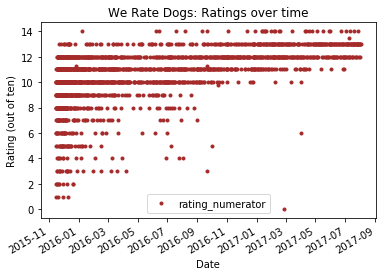

In [59]:
# This chart shows that indeed the ratings have become more generous over time. The earliest tweets have  

ax1 = df_master.plot(x='timestamp', y='rating_numerator', color='brown', style='.')

plt.title('We Rate Dogs: Ratings over time')
plt.xlabel('Date')
plt.ylabel('Rating (out of ten)');

### How do the different dog stages break down?

The 


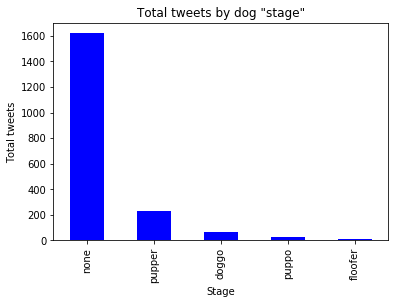

In [163]:
df_master.stage.value_counts().plot(kind='bar', color='b')
plt.title('Total tweets by dog "stage"')
plt.ylabel('Total tweets')
plt.xlabel('Stage');

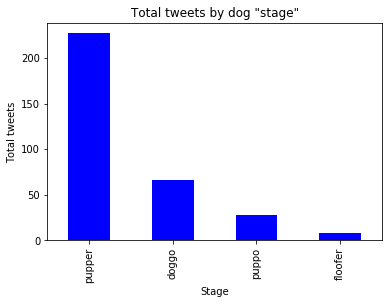

In [167]:
# This chart omits none stage dogs to give a closer look. Most dogs are described as puppers if at all. 
df_master.stage.value_counts()[1:].plot(kind='bar', color='b')
plt.title('Total tweets by dog "stage"')
plt.ylabel('Total tweets')
plt.xlabel('Stage');

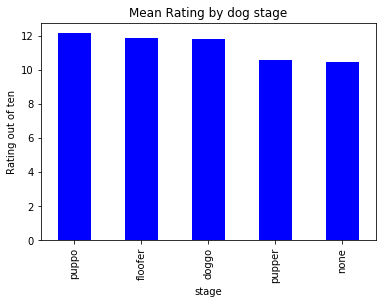

In [156]:
# But puppers have a lower rating on average than the other three stage classificaitons. 

df_master.groupby('stage')['rating_numerator'].mean().sort_values(ascending=False).plot(kind='bar', color='b')
plt.ylabel('Rating out of ten')
plt.title('Mean Rating by dog stage');

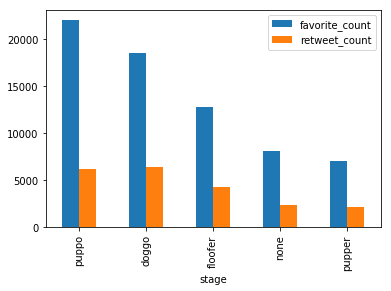

In [146]:
df_master.groupby('stage')['favorite_count', 'retweet_count'].mean()\
    .sort_values(by='favorite_count',ascending=False).plot(kind='bar');


## Look at the different breeds. 

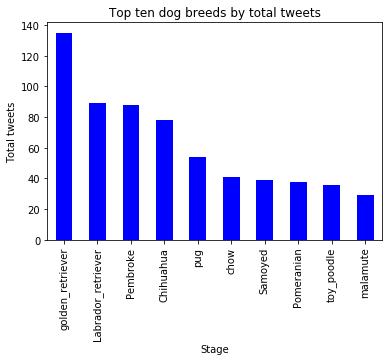

In [158]:
# Most popular breeds are golden retriever, lab, pembroke (corgi), chihuahua and pug. 
df_master.p1.value_counts()[:10].plot(kind='bar', color='b')
plt.title('Top ten dog breeds by total tweets')
plt.ylabel('Total tweets')
plt.xlabel('Breed');

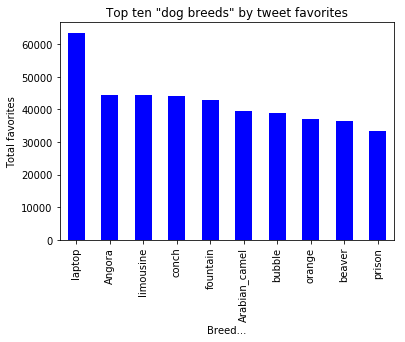

In [161]:
# Wow this is ridiculous: are any of these dog breeds?
# Trying to see which tweets are most popular by dog breed, but these are... not dogs!

df_master.groupby('p1')['favorite_count'].mean().sort_values(ascending=False)[:10].plot(kind='bar', color='b')
plt.title('Top ten "dog breeds" by tweet favorites')
plt.ylabel('Total favorites')
plt.xlabel('Breed...');

In [110]:
# There are lots of whacky things showing up from the image recognition. Most of the recurring ones are dog breeds tho. 
# I will drop a bunch of rows to get only dog breeds then do the visualation again.
df_master.p1.value_counts()

golden_retriever             135
Labrador_retriever            89
Pembroke                      88
Chihuahua                     78
pug                           54
chow                          41
Samoyed                       39
Pomeranian                    38
toy_poodle                    36
malamute                      29
cocker_spaniel                27
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            21
seat_belt                     21
German_shepherd               20
Siberian_husky                19
Staffordshire_bullterrier     18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
Cardigan                      17
beagle                        17
Shih-Tzu                      17
Italian_greyhound             16
Rottweiler                    16
teddy                         16
Lakeland_terrier              15
kuvasz                        15
web_site                      14
          

In [133]:
# Dropping the rows with whacky p1 image recognitions
# Making a new df for this just so we don't delete so many rows from the master.
# this stack post was helfpul
# https://stackoverflow.com/questions/34913546/remove-low-counts-from-pandas-data-frame-column-on-condition

s = df_master['p1'].value_counts()
df_breeds = df_master.loc[df_master['p1'].isin(s.index[s >= 10])]
df_breeds = df_breeds[df_breeds.p1 != 'seat_belt']
df_breeds = df_breeds[df_breeds.p1 != 'web_site']


In [135]:
df_breeds.p1.value_counts()[:10]

golden_retriever      135
Labrador_retriever     89
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                39
Pomeranian             38
toy_poodle             36
malamute               29
Name: p1, dtype: int64

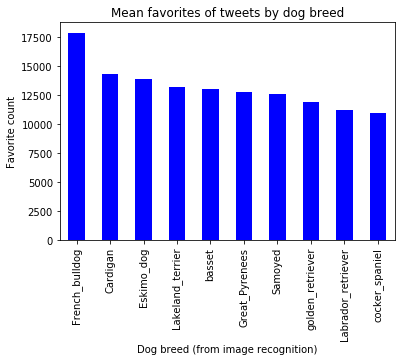

In [159]:
# Here we go with the dog breeds by favorites
df_breeds.groupby('p1')['favorite_count'].mean().sort_values(ascending=False)[:10].plot(kind='bar', color='b')
plt.xlabel('Dog breed (from image recognition)')
plt.ylabel('Favorite count')
plt.title('Mean favorites of tweets by dog breed');